<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 5

Total points: 55

Due:  to be submitted via Canvas by 11:59 pm, Mon Nov 21st.

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Disha Gandhi

EID: dsg2258

Name: Kshitij Mahajan

EID: ksm3267

In [61]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost
import pandas as pd
import warnings

%matplotlib inline

# Question 1: Ensemble Methods [10 pts]
Read this [article](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) on different boosting methods. Briefly describe the main advantages and disadvantages of  CatBoost as compared to XGBoost.

#### Advantages of Catboost over XGBoost

1. Catboost is 3.5 times faster when compared to XGBoost while training the model. This even applies to the time taken to tune the hyperparameters. 
2. XGboost is not using any weighted sampling techniques, which makes its splitting process slower compared to MVS which is the splitting technique used in Catboost.
3. Unlike Catboost, XGboost cannot handle categorical features by itself, it only accepts numerical values similar to Random Forest. Therefore we have to first encode categorical data before passing it to the XGBoost model.
4. There is no need to encode and transform any categorical data in case of Catboost, the model automatically handles it.
5. Catboost builds symmetrically balanced trees which is not the case for XGBoost. In every node, leaves from the previous tree are split using the same condition. The feature that gives thelowest loss is the best split and used for all the level’s nodes. This architecture aids in efficient computational resource utilization, decreases prediction time, and controls overfitting. 
6. Catboost provides some inherent missing values strategies for processing missing values.


#### Disadvantages of Catboost over XGBoost

1. XGBoost is very transparent, because of the ease in plotting of trees probably because it has no built-in categorical feature encoding.
2. Catboost works well only if we have categorical data otherwise the performance of XGboost and Catboost is the same. There is even slightly better performance of XGboost over Catboost in some cases.
3. Catboost can perform very bad if the variables are not tuned properly.

# Question 2 : Ensemble Methods for Classification [25 pts]

We look at the following dataset [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) for this question. The dataset is extremely large so for this question we only consider a subset of the data which has been provided along with the notebook for this assignment.
The task is to predict the probability that someone will experience financial distress in the next two years. The dataset has already been split into train and test sets.

In [41]:
data = pd.read_csv('https://raw.githubusercontent.com/KshitijMahajan1998/AML_NEW/main/hw5_data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [42]:
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3750, 10) (3750,)
test (1250, 10) (1250,)


In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

a) **[2.5 pts]** Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

b) **[2.5 pts]** Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

c) **[5 pts]** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters.

d) **[5 pts]** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

e) **[5 pts]** Use [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

f) **[5 pts]** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [44]:
columns_list = list(X.columns)

a) **[2.5 pts]** Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

In [45]:
# Part a)
dcf= DecisionTreeClassifier(random_state = 14 )
  
# Performing training
dcf.fit(X_train, y_train)
y_pred=dcf.predict(X_test)
y_pred_prob=dcf.predict_proba(X_test)[:,1]
results=pd.DataFrame(columns=['Model','Accuracy Score','ROC_AUC Score'])
new_row={'Model':'Decision Tree','Accuracy Score':accuracy_score(y_test,y_pred)*100,'ROC_AUC Score':roc_auc_score(y_test,y_pred_prob)*100}
results=results.append(new_row,ignore_index=True)
print ("Accuracy Score : ", accuracy_score(y_test,y_pred)*100)
print ("ROC_AUC score : ", roc_auc_score(y_test,y_pred_prob)*100)

Accuracy Score :  88.8
ROC_AUC score :  58.54582176218127


b) **[2.5 pts]** Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

In [46]:
# Part b)
clf = BaggingClassifier(n_estimators=25, random_state=14).fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred_prob=clf.predict_proba(X_test)[:,1]
new_row={'Model':'Bagging','Accuracy Score':accuracy_score(y_test,y_pred)*100,'ROC_AUC Score':roc_auc_score(y_test,y_pred_prob)*100}
results=results.append(new_row,ignore_index=True)
print ("Accuracy Score : ", accuracy_score(y_test,y_pred)*100)
print ("ROC_AUC score : ", roc_auc_score(y_test,y_pred_prob)*100)

Accuracy Score :  92.56
ROC_AUC score :  78.5710679121434


c) **[5 pts]** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters.

In [47]:
# Part c)
warnings.simplefilter(action='ignore', category=FutureWarning)

clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}
# Grid search
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid)
CV_rfc.fit(X_train, y_train)
print ("Best parameters - Random Forest")
print (CV_rfc.best_params_)


Best parameters - Random Forest
{'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17}


In [48]:
best_param_RF = CV_rfc.best_estimator_
pred=best_param_RF.predict(X_test)
pred_prob=best_param_RF.predict_proba(X_test)[:,1]
new_row={'Model':'Random Forest','Accuracy Score':accuracy_score(y_test,y_pred)*100,'ROC_AUC Score':roc_auc_score(y_test,y_pred_prob)*100}
results=results.append(new_row,ignore_index=True)
print("Accuracy for Random Forest on test data: ",accuracy_score(y_test,pred)*100)
print("ROC AUC score for Random Forest on test data: ",roc_auc_score(y_test,pred_prob)*100)

Accuracy for Random Forest on test data:  93.2
ROC AUC score for Random Forest on test data:  83.75612219136582


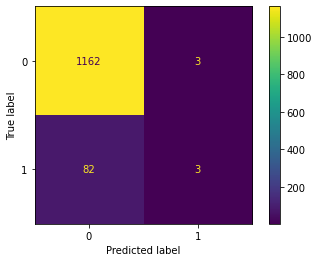

In [49]:
#Confusion matrix 
plot_confusion_matrix(CV_rfc, X_test, y_true=y_test)


d) **[5 pts]** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

In [50]:
# Part d)
clf = AdaBoostClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
CV_ada = GridSearchCV(clf,param_grid)
CV_ada.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [10, 100], 'random_state': [17]})

In [51]:
print ("Best parameters - Adaboost")
print (CV_ada.best_params_)

Best parameters - Adaboost
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}


In [52]:
best_param_ada= CV_ada.best_estimator_
pred_ada=best_param_ada.predict(X_test)
pred_prob=best_param_ada.predict_proba(X_test)[:,1]
new_row={'Model':'Adaboost','Accuracy Score':accuracy_score(y_test,pred_ada)*100,'ROC_AUC Score':roc_auc_score(y_test,pred_prob)*100}
results=results.append(new_row,ignore_index=True)
print("Accuracy for Adaboost on test data: ",accuracy_score(y_test,pred_ada)*100)
print("ROC AUC score for Adaboost on test data: ",roc_auc_score(y_test,pred_prob)*100)

Accuracy for Adaboost on test data:  93.28
ROC AUC score for Adaboost on test data:  83.90254986114618


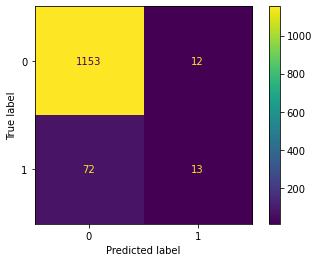

In [53]:
#Confusion matrix 
plot_confusion_matrix(CV_ada, X_test, y_true=y_test)

e) **[5 pts]** Use [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

In [54]:
# Part e)
clf = GradientBoostingClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }
# Grid search
CV_gbc = GridSearchCV(clf,param_grid)
CV_gbc.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [10, 100], 'random_state': [17]})

In [55]:
print ("Best parameters - Gradient Boosting")
print (CV_gbc.best_params_)

Best parameters - Gradient Boosting
{'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 17}


In [56]:
best_param_gbc = CV_gbc.best_estimator_
pred_gbc=best_param_gbc.predict(X_test)
pred_prob=best_param_gbc.predict_proba(X_test)[:,1]
new_row={'Model':'Gradient Boosting','Accuracy Score':accuracy_score(y_test,pred_gbc)*100,'ROC_AUC Score':roc_auc_score(y_test,pred_prob)*100}
results=results.append(new_row,ignore_index=True)
print("Accuracy for Gradient Boosting on test data: ",accuracy_score(y_test,pred_gbc)*100)
print("ROC AUC score for Gradient Boosting on test data: ",roc_auc_score(y_test,pred_prob)*100)

Accuracy for Gradient Boosting on test data:  93.2
ROC AUC score for Gradient Boosting on test data:  83.66372128250441


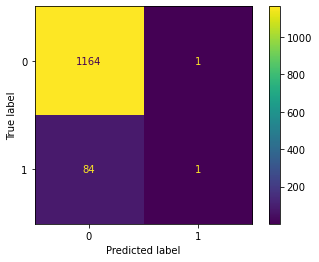

In [57]:
#Confusion matrix 
plot_confusion_matrix(CV_gbc, X_test, y_true=y_test)

f) **[5 pts]** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [59]:
results

,Model,Accuracy Score,ROC_AUC Score
0,Decision Tree,88.8,58.545822
1,Bagging,92.56,78.571068
2,Random Forest,92.56,78.571068
3,Adaboost,93.28,83.90255
4,Gradient Boosting,93.2,83.663721


1.Adaboost have the best accuracy among the three ensemble models and hence performs the best. It performs better than GBM. This can be accounted to the overfitting of GBM.

2 Ensemble methods have  slightly better accuraacy scores than decision tree. The reason behind this can be the imbalance in our dataset as seen previously.

3.Considering ROC_AUC score, decision tree classifier has better score when compared to three ensemble methods.

## Question 3: XGBoost on Datasets with varying Class Imbalance [15 points]

You are given three datasets (all extracted from the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset which was used in the last question). They have varying levels of class imbalance (positive to negative class ratio):
1. dataset_equally_biased_final has a class ratio of 1:1
2. dataset_originally_biased_final has a class ratio of 1:15
3. dataset_highly_biased_final has a class ratio of 1:39

Use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) on these three datasets and plot the [calibration curves](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve) for your predictions. Examine both uniform and quantile binning strategies for your plots and observe how the plots look. For which of the datasets is you model calibrated the best? Which of the binning strategies provide more informative visualization for each of the datasets?

In [60]:

dataset = pd.read_csv("https://raw.githubusercontent.com/KshitijMahajan1998/AML_NEW/main/data_equally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Balanced Dataset")
# Number of classes in training Data
print(y_train1.value_counts())
# Number of classes in test Data
print(y_test1.value_counts())

dataset = pd.read_csv("https://raw.githubusercontent.com/KshitijMahajan1998/AML_NEW/main/data_originally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Originally Imbalanced Dataset")
# Number of classes in training Data
print(y_train2.value_counts())
# Number of classes in test Data
print(y_test2.value_counts())

dataset = pd.read_csv("https://raw.githubusercontent.com/KshitijMahajan1998/AML_NEW/main/data_highly_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Highly Imbalanced Dataset")
# Number of classes in training Data
print(y_train3.value_counts())
# Number of classes in test Data
print(y_test3.value_counts())

Balanced Dataset
0    4000
1    4000
Name: SeriousDlqin2yrs, dtype: int64
0    1000
1    1000
Name: SeriousDlqin2yrs, dtype: int64
Originally Imbalanced Dataset
0    7466
1     534
Name: SeriousDlqin2yrs, dtype: int64
0    1866
1     134
Name: SeriousDlqin2yrs, dtype: int64
Highly Imbalanced Dataset
0    7800
1     200
Name: SeriousDlqin2yrs, dtype: int64
0    1950
1      50
Name: SeriousDlqin2yrs, dtype: int64


In [62]:
# Using the earlier dataset and applying XGBoost on it

clf = xgboost.XGBClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

# Balanced Dataset
print("Balanced Dataset")
grid_search.fit(X_train1, y_train1)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train1, y_train1)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt1 = clf.predict(X_test1)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test1, y_pred_gbt1))

y_pred_proba1 = clf.predict_proba(X_test1)[:,1]

acc_score = accuracy_score(y_test1,y_pred_gbt1)
auc_score = roc_auc_score(y_test1,y_pred_proba1)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))


# Originally Imbalanced Dataset

print("Originally Imbalanced Dataset")
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train2, y_train2)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt2 = clf.predict(X_test2)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test2, y_pred_gbt2))

y_pred_proba2 = clf.predict_proba(X_test2)[:,1]

acc_score = accuracy_score(y_test2,y_pred_gbt2)
auc_score = roc_auc_score(y_test2,y_pred_proba2)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

# Highly Imalanced Dataset

print("Highly Imbalanced Dataset")
grid_search.fit(X_train3, y_train3)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train3, y_train3)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt3 = clf.predict(X_test3)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test3, y_pred_gbt3))

y_pred_proba3 = clf.predict_proba(X_test3)[:,1]

acc_score = accuracy_score(y_test3,y_pred_gbt3)
auc_score = roc_auc_score(y_test3,y_pred_proba3)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

Balanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.778 s
predict time 0.006 s
XGBoost conf matrix: 
[[794 206]
 [228 772]]
Accuracy: 0.783
 AUC_ROC: 0.856863

Originally Imbalanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.759 s
predict time 0.007 s
XGBoost conf matrix: 
[[1843   23]
 [ 114   20]]
Accuracy: 0.9315
 AUC_ROC: 0.8342691686263217

Highly Imbalanced Dataset
{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.684 s
predict time 0.006 s
XGBoost conf matrix: 
[[1945    5]
 [  50    0]]
Accuracy: 0.9725
 AUC_ROC: 0.8398564102564102



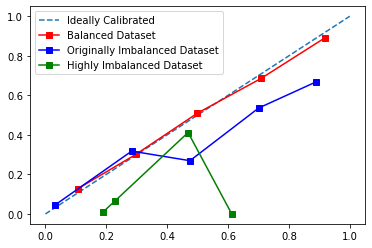

In [63]:
prob_true1, prob_pred1 = calibration_curve(y_test1, y_pred_proba1,strategy='uniform')
prob_true2, prob_pred2 = calibration_curve(y_test2, y_pred_proba2,strategy='uniform')
prob_true3, prob_pred3 = calibration_curve(y_test3, y_pred_proba3,strategy='uniform')

#Plot all calibration curves for strategy = 'uniform' (It is uniform by default)
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
# Plot model's calibration curve
plt.plot( prob_pred1,prob_true1, 's-', color='red', label='Balanced Dataset')
plt.plot( prob_pred2,prob_true2,'s-', color='blue', label='Originally Imbalanced Dataset')
plt.plot( prob_pred3,prob_true3, 's-', color='green', label='Highly Imbalanced Dataset')
plt.legend()


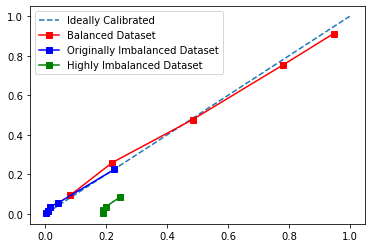

In [64]:
#Plot all calibration curves for strategy = 'quantile'
prob_true1, prob_pred1 = calibration_curve(y_test1, y_pred_proba1,strategy='quantile')
prob_true2, prob_pred2 = calibration_curve(y_test2, y_pred_proba2,strategy='quantile')
prob_true3, prob_pred3 = calibration_curve(y_test3, y_pred_proba3,strategy='quantile')

#Plot all calibration curves for strategy = 'uniform' (It is uniform by default)
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
# Plot model's calibration curve
plt.plot( prob_pred1,prob_true1, 's-', color='red', label='Balanced Dataset')
plt.plot( prob_pred2,prob_true2,'s-', color='blue', label='Originally Imbalanced Dataset')
plt.plot( prob_pred3,prob_true3, 's-', color='green', label='Highly Imbalanced Dataset')
plt.legend()

1. Calibration curve of XGBoost with balanced dataset closely follows the ideally calibrated curve. Hence,XGBoost with balanced dataset has the best calibration among the given models.

2. For each of the dataset, the quantile strategy gives more information.We can see all 6 datapoints irrespective of whether or not the model makes predictions within the given bin. This is better than uniform strategy because in the uniform strategy we see that the green and blue lines are missing some points compared to the red line showing lack of information.

# Question 4: Deep Learning Mechanisms [5 points]

Briefly explain the motivation behind the following mechanisms commonly used in deep learning: <br>
**a) [2.5 pts] Skip connections <br>**

We all know that Backpropagation uses the chain rule to calculate the gradient, and as we go forward to earlier layers from the back, the gradient keeps getting smaller and smaller and becomes 0 in some cases.And if it becomes 0, we don't update the weights for that layer and simply skip it. This issue is also called as vanishing gradient and in order to improve upon it, we use skip connections.

Skip connections skips some layers in the network providing an alternate path for the gradient. It feeds output of one layer as input to other layers. This helps skip connections achieve a much smoother loss surface resulting in faster model convergence. 

There are two ways we can use skip connections 

1. **ResNet:** This is skip connections via addition. Basically, back-propagating through the identity function by using vector addition and in this process preserving the gradient.
2. **DenseNet:** This is skip connections via concatenation. Basically, concatenating feature maps to ensure maximum information flow between layers. Hence reusing features from the earlier layers.

To conclude, skip connections make for an uninterrupted gradient flow from the first to last layer and feature reusability is also an added incentive.

**b) [2.5 pts] Batch normalization**

Normalization is compressing a range of numbers to a fixed range mostly in between 0 and 1 to bring all the distributions to the same scale. Because of normalization, our inputs are standard, and so all model parameters have the same level to compete and helps in faster model convergence. 

As for Deep Learning, because we pass different mini-batches of data through the network instead of the whole data together, the input distribution keeps changing. But by applying normalization to each layer based on batch / mini-batch statistics we can help the model to converge faster in order to avoid unstable gradients. Exploding and vanishing gradients are very common when the parameters are in different scales.